In [9]:
import pandas as pd

import numpy as np
from sklearn import preprocessing
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion

# for cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_validation
from sklearn.model_selection import cross_val_predict, cross_val_score

# for various metrics and reporting
from sklearn import metrics 
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# feature selection
from sklearn.feature_selection import SelectFromModel

# xgboost library
from xgboost import XGBClassifier

# plot feature importance
from xgboost import plot_importance, plot_tree



In [39]:
df1=pd.read_csv("bad-words.csv").rename(columns={"jigaboo":0})

In [40]:
df1


,0
0,mound of venus
1,asslover
2,s&m
3,queaf
4,whitetrash
...,...
1611,cocky
1612,transsexual
1613,unfuckable
1614,bestiality


In [8]:
def get_data():
    data_path = "badwords.csv"
    df = pd.read_csv(data_path, index_col=0) 
    df = df.sample(frac=1).reset_index(drop=True)  
    return df 

In [40]:
file= open("full-list-of-bad-words_comma-separated-text-file_2018_07_30.txt", 'r')
data = file.read().replace('\n', '')

In [41]:
list =data.split(",")

In [42]:
df=pd.DataFrame(list)

In [44]:
df

,0
0,2 girls 1 cup
1,2g1c
2,4r5e
3,5h1t
4,5hit
...,...
1698,yiffy
1699,yobbo
1700,zibbi
1701,zoophilia


In [45]:
df=pd.concat([df,df1])

In [24]:
import nltk 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hedi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
text="I do not like green eggs and ham I do not like them Sam-I-am."

In [45]:
list=[i for i in df[0]]

In [16]:
def analysetext(text):
    x=0
    y=0
    listt = nltk.tokenize.sent_tokenize(text)
    for i in listt :
        bol=False
        for  j in list:
            if (j in i) :
                bol=True
        if bol : x+=1       
        y+=1
    return(x)

            

In [89]:
analysetext(text)

['“Hi Amy!', 'Your mum sent me a text.', 'You forgot your inhaler.', 'Why don’t you turn your phone on?” Amy didn’t like technology.', 'She never sent text messages and she hated Facebook too.“Did Kamal ask you to the disco?” Tara was Amy’s best friend, and she wanted to know everything that was happening in Amy’s life.', '“I don’t think he likes me,” said Amy.', '“And I never see him alone.', 'He’s always with Grant.” Amy and Tara didn’t like Grant.“Do you know about their art project?” asked Amy.', '“It’s about graffiti, I think,” said Tara.', '“They’re working on it at the old house behind the factory.” “But that building is dangerous,” said Amy.', '“Aah, are you worried he’s going to get hurt?"', 'Tara teased.', '“Shut up, Tara!', 'Hey look, here they come!”Kamal and Grant arrived.', '“Hi Kamal!” said Tara.', '“Are you going to the Halloween disco tomorrow?” “Yes.', 'Hi Amy,” Kamal said, smiling.', '“Do you want to come and see our paintings after school?” “I’m coming too!” Tara in

(11, 31)

In [90]:
clear()

In [86]:
text='“Hi Amy! Your mum sent me a text. You forgot your inhaler. Why don’t you turn your phone on?” Amy didn’t like technology. She never sent text messages and she hated Facebook too.“Did Kamal ask you to the disco?” Tara was Amy’s best friend, and she wanted to know everything that was happening in Amy’s life. “I don’t think he likes me,” said Amy. “And I never see him alone. He’s always with Grant.” Amy and Tara didn’t like Grant.“Do you know about their art project?” asked Amy. “It’s about graffiti, I think,” said Tara. “They’re working on it at the old house behind the factory.” “But that building is dangerous,” said Amy. “Aah, are you worried he’s going to get hurt?" Tara teased. “Shut up, Tara! Hey look, here they come!”Kamal and Grant arrived. “Hi Kamal!” said Tara. “Are you going to the Halloween disco tomorrow?” “Yes. Hi Amy,” Kamal said, smiling. “Do you want to come and see our paintings after school?” “I’m coming too!” Tara insisted.After school, Kamal took the girls to the old house. It was very old and very dirty too. There was rubbish everywhere. The windows were broken and the walls were damp. It was scary. Amy didn’t like it. There were paintings of zombies and skeletons on the walls. “We’re going to take photos for the school art competition,” said Kamal. Amy didn’t like it but she didn’t say anything. “Where’s Grant?” asked Tara. “Er, he’s buying more paint.” Kamal looked away quickly. Tara thought he looked suspicious. “It’s getting dark, can we go now?” said Amy. She didn’t like zombies.'

In [ ]:
#model to test if a  sentence contain a bad words  using embbeding

In [2]:
from gensim.models import KeyedVectors,word2vec

#model=KeyedVectors.load_word2vec_format("C:\Users\hedi\Desktop\factory619 internship\GoogleNews-vectors-negative300.bin", binary=True)

wv = KeyedVectors.load_word2vec_format('../GoogleNews-vectors-negative300.bin', binary=True, limit=500000)
wv.init_sims(replace=True)
from itertools import islice
list(islice(wv.vocab, 13030, 13050))
type(wv)


gensim.models.keyedvectors.Word2VecKeyedVectors

In [20]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [21]:
from sklearn.model_selection import train_test_split
    
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens
    
train, test = train_test_split(df1, test_size=0.3, random_state = 42)

test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['Comment']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['Comment']), axis=1).values

X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)






NameError: name 'wv' is not defined

In [8]:
from xgboost import XGBClassifier
# # train XGBoost model with default parameters and  
my_model = XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 300)
model = XGBClassifier()
# my_model.fit(X_train_word_average, train["class"] ,verbose=False)

In [9]:
               
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# print('accuracy %s' % accuracy_score(y_pred, test["subj or obj"]))
# # and save our model
# my_model.save_model("xgboost_baseline.model")

In [10]:
    df1=pd.read_csv("train.csv",delimiter=",")

In [11]:
df1.Insult.value_counts()

0    2898
1    1049
Name: Insult, dtype: int64

In [20]:
df1

,Insult,Date,Comment
0,1,20120618192155Z,"""You fuck your dad."""
1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,0,NaN,"""listen if you dont wanna get married to a man..."
4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."
...,...,...,...
3942,1,20120502172717Z,"""you are both morons and that is never happening"""
3943,0,20120528164814Z,"""Many toolbars include spell check, like Yahoo..."
3944,0,20120620142813Z,"""@LambeauOrWrigley\xa0\xa0@K.Moss\xa0\nSioux F..."
3945,0,20120528205648Z,"""How about Felix? He is sure turning into one ..."


In [ ]:
#cleaning

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem.porter import *
import string
import re

stopwords=stopwords = nltk.corpus.stopwords.words("english")

other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)

stemmer = PorterStemmer()


def preprocess(text_string):
    """
    Accepts a text string and replaces:
    1) urls with URLHERE
    2) lots of whitespace with one instance
    3) mentions with MENTIONHERE

    This allows us to get standardized counts of urls and mentions
    Without caring about specific people mentioned
    """
    space_pattern = '\s+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    hashtag_regex = '#[\w\-]+'
    
#     regrex='RT :+'
#     text_string = re.sub(regrex, '', text_string)
    
    parsed_text = re.sub(space_pattern, ' ', text_string)
    parsed_text = re.sub(giant_url_regex, '', parsed_text)
    parsed_text = re.sub(mention_regex, '', parsed_text)
    parsed_text = re.sub(hashtag_regex, '', parsed_text)
    parsed_text = re.sub('RT', '', parsed_text,1)
#     parsed_text=parsed_text.translate(str.maketrans('', '', string.punctuation))
    
    #parsed_text = parsed_text.code("utf-8", errors='ignore')
    return parsed_text

def tokenize(tweet):
    """Removes punctuation & excess whitespace, sets to lowercase,
    and stems tweets. Returns a list of stemmed tokens."""
    tweet = " ".join(re.split("[^a-zA-Z]*", tweet.lower())).strip()
    #tokens = re.split("[^a-zA-Z]*", tweet.lower())
    tokens = [stemmer.stem(t) for t in tweet.split()]
    return tokens

def basic_tokenize(tweet):
    """Same as tokenize but without the stemming"""
    tweet = " ".join(re.split("[^a-zA-Z.,!?]*", tweet.lower())).strip()
    return tweet.split()

vectorizer = TfidfVectorizer(
    #vectorizer = sklearn.feature_extraction.text.CountVectorizer(
    tokenizer=tokenize,
    preprocessor=preprocess,
    ngram_range=(1, 3),
    stop_words=stopwords, #We do better when we keep stopwords
    use_idf=True,
    smooth_idf=False,
    norm=None, #Applies l2 norm smoothing
    decode_error='replace',
    max_features=10000,
    min_df=5,
    max_df=0.501
    )

def Punctuation(string): 
  
    # punctuation marks 
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~1234567890'''
    for x in string.lower(): 
        if x in punctuations: 
            string = string.replace(x, "") 
  
    # Print string without punctuation 
    return(string) 
  

In [13]:
df1.Comment=df1.Comment.apply(lambda x:preprocess(x))

df1.Comment=df1.Comment.apply(lambda x:Punctuation(x))
# df.tweet.apply(lambda x:preprocess(x))

In [14]:
df1

,Insult,Date,Comment
0,1,20120618192155Z,You fuck your dad
1,0,20120528192215Z,i really dont understand your pointxa It seems...
2,0,NaN,Axcxamajority of Canadians can and has been wr...
3,0,NaN,listen if you dont wanna get married to a man ...
4,0,20120619094753Z,Cxec buean xuuedng uubueddng biuecu txecnh cx...
...,...,...,...
3942,1,20120502172717Z,you are both morons and that is never happening
3943,0,20120528164814Z,Many toolbars include spell check like Yahoo f...
3944,0,20120620142813Z,xaxaMossxanSioux Falls SD I told my boy he sho...
3945,0,20120528205648Z,How about Felix He is sure turning into one he...


In [15]:
l=[]
for i in df1.Comment :
    l.append(analysetext(i))
    
        

NameError: name 'analysetext' is not defined

In [65]:
j=0
x=0
for i in df1.Insult:
    if (i ==l[j]):
        x+=1
    
    

In [66]:
x

1049

In [67]:
len(l)

3947

In [23]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import text_to_word_sequence
import os
from tqdm import tqdm
import re
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from datetime import datetime

In [17]:
MAX_WORD_TO_USE = 10000 # how many words to use in training
MAX_LEN = 80 # number of time-steps.
EMBED_SIZE = 100 #GLoVe 100-D
batchSize = 128 # how many samples to feed neural network
GRU_UNITS = 256 # Number of nodes in GRU Layer
numClasses = 2 #{Positive,Negative}
iterations = 100000 # How many iterations to train
nodes_on_FC = 64 # Number of nodes on FC layer
epsilon = 1e-4# For batch normalization
val_loop_iter = 50 # in how many iters we record

In [37]:
# train['Comment'] = train['Comment'].apply(lambda x: ' '.join( text_to_word_sequence(x) ) )
# test['Comment'] = test['Comment'].apply(lambda x: ' '.join( text_to_word_sequence(x) ) )

In [25]:
from keras.preprocessing.text import Tokenizer
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df1['Comment'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 18179 unique tokens.


In [26]:

## Tokenize the sentences
from  keras.preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(df1['Comment'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (3947, 250)


In [27]:
Y = pd.get_dummies(df1['Insult']).values
print('Shape of label tensor:', Y.shape)


Shape of label tensor: (3947, 2)


In [28]:
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,GRU
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
import plotly.graph_objs as go
# import plotly.plotly as py
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)


(3552, 250) (3552, 2)
(395, 250) (395, 2)


In [30]:
from keras.layers import Bidirectional
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
# model.add(Bidirectional(LSTM(100)))
model.add(GRU(128,unroll=True))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

C:\Users\hedi\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning:

Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.



Train on 3196 samples, validate on 356 samples
Epoch 1/5
3196/3196 [==============================] - ETA: 14:42 - loss: 0.6943 - accuracy: 0.500 - ETA: 7:23 - loss: 0.6900 - accuracy: 0.601 - ETA: 4:57 - loss: 0.6872 - accuracy: 0.63 - ETA: 3:43 - loss: 0.6849 - accuracy: 0.64 - ETA: 2:59 - loss: 0.6806 - accuracy: 0.67 - ETA: 2:30 - loss: 0.6802 - accuracy: 0.66 - ETA: 2:08 - loss: 0.6777 - accuracy: 0.66 - ETA: 1:52 - loss: 0.6737 - accuracy: 0.67 - ETA: 1:39 - loss: 0.6720 - accuracy: 0.67 - ETA: 1:29 - loss: 0.6685 - accuracy: 0.67 - ETA: 1:20 - loss: 0.6655 - accuracy: 0.67 - ETA: 1:13 - loss: 0.6630 - accuracy: 0.67 - ETA: 1:07 - loss: 0.6523 - accuracy: 0.69 - ETA: 1:02 - loss: 0.6488 - accuracy: 0.69 - ETA: 57s - loss: 0.6473 - accuracy: 0.6906 - ETA: 53s - loss: 0.6443 - accuracy: 0.692 - ETA: 49s - loss: 0.6390 - accuracy: 0.696 - ETA: 46s - loss: 0.6294 - accuracy: 0.704 - ETA: 42s - loss: 0.6193 - accuracy: 0.711 - ETA: 40s - loss: 0.6172 - accuracy: 0.712 - ETA: 37s - los

In [31]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))


395/395 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 2ms/step
Test set
  Loss: 0.980
  Accuracy: 0.754


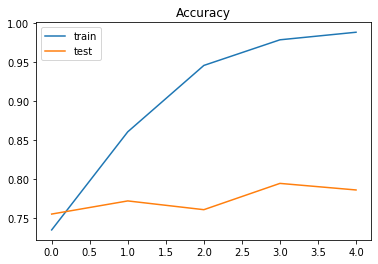

In [36]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [41]:
X_train

array([[    0,     0,     0, ...,   267,    33,  1557],
       [    0,     0,     0, ...,   122,  1004,   615],
       [    0,     0,     0, ...,     4,   295,   494],
       ...,
       [    0,     0,     0, ...,    13,     7,   322],
       [    0,     0,     0, ...,   550,    12,  2999],
       [    0,     0,     0, ..., 14487,    53,  1579]])

In [6]:
KERAS()

NameError: name 'ind_to_vec' is not defined

In [42]:
#linearsvc
#perform well
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import LinearSVC

text_train, text_test, y_train, y_test = train_test_split(df1["Comment"], df1["Insult"], 
    test_size=0.2)
vect = CountVectorizer(ngram_range=(1, 2),stop_words=None,lowercase=True,max_df=0.8, min_df=20)
tfidf = TfidfTransformer()
clf = LinearSVC(C=5000.0)

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(text_train, y_train)

# %%time
from sklearn.metrics import classification_report
y_pred = nb.predict(text_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

accuracy 0.740506329113924
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       575
           1       1.00      0.05      0.09       215

    accuracy                           0.74       790
   macro avg       0.87      0.52      0.47       790
weighted avg       0.81      0.74      0.64       790



In [2]:
df=pd.read_csv('train_preprocessed.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 10 columns):
comment_text     159571 non-null object
id               159571 non-null object
identity_hate    159571 non-null float64
insult           159571 non-null float64
obscene          159571 non-null float64
set              159571 non-null object
severe_toxic     159571 non-null float64
threat           159571 non-null float64
toxic            159571 non-null float64
toxicity         159571 non-null float64
dtypes: float64(7), object(3)
memory usage: 12.2+ MB


In [46]:
df.head()

,comment_text,id,identity_hate,insult,obscene,set,severe_toxic,threat,toxic,toxicity
0,explanation why the edits made under my userna...,0000997932d777bf,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
1,d aww he matches this background colour i m s...,000103f0d9cfb60f,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
2,hey man i m really not trying to edit war it...,000113f07ec002fd,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
3,more i can t make any real suggestions on im...,0001b41b1c6bb37e,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0
4,you sir are my hero any chance you remember...,0001d958c54c6e35,0.0,0.0,0.0,train,0.0,0.0,0.0,0.0


In [4]:
df.insult.value_counts()

0.0    151694
1.0      7877
Name: insult, dtype: int64

In [1]:
  
from docutils.nodes import header
from keras.layers import GRU
from numpy.core.multiarray import dtype
from pygments.lexer import words
from nltk import *
from nltk.tokenize import *
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from keras.preprocessing import sequence,text
from keras import *
from keras.layers import *
import keras
import os
import string
from nltk.corpus import stopwords
from keras import backend as K
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.python.tools import freeze_graph
from tensorflow.python.tools import optimize_for_inference_lib

Using TensorFlow backend.


In [7]:
MODEL_NAME = "gp"
Wk = word_tokenize
LEM = stem.WordNetLemmatizer()
EMBEDDING_DIM = 50
MAX_SEQUENCE_LENGTH = 20
HIDDEN_LAYER_SIZE = 200
LAYERS = 1

def embedding(data):
    embeddings_index = {}
    f = open(os.path.join('glove.6B.50d.txt'), encoding="utf8")
    for line in f:
        values = str(line).split(' ')
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()
    for sent in data:
        for word in sent:
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is None:
                embeddings_index[word] = np.random.rand(EMBEDDING_DIM)
                print("iiiiiiiiiiiiiiiiiiiiiiii  = ",word, " sss ")
    length = len(embeddings_index)+1
    ind_to_word = []
    word_to_ind = {}
    ind_to_vec = np.random.rand(length,EMBEDDING_DIM)
    ind_to_vec[0] = np.zeros(EMBEDDING_DIM)
    ind = 1
    for word , vec in embeddings_index.items():
        ind_to_word.append(word)
        ind_to_vec[ind] = vec
        word_to_ind[word] = ind
        ind += 1
    return ind_to_vec , word_to_ind , ind_to_word

def seq_data(data,word_to_ind):
    temp = data.apply(lambda row: [word_to_ind[i] for i in row])
    return temp

In [8]:
def read_data():
    data = pd.read_csv('train_preprocessed.csv')
    x = data['comment_text']
    y = data['insult']
    temp_unique_label = y.unique()
    unique_label = {}
    for i , label in enumerate(temp_unique_label):
        unique_label[i] = label
        y= y.replace((label),(i))
    y = keras.utils.to_categorical(y,len(unique_label))
    x = preprocess(x)
    return x ,y,unique_label

In [9]:
def preprocess(data,stem = False):
    #stop = stopwords.words('english')
    stop = list(string.punctuation)
    #stop = ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']
    print(stop)
    tokenizer = TreebankWordTokenizer()
    p_stemmer = PorterStemmer()
    list_of_X = data.apply(lambda row: row.lower())
    # list_of_X = list_of_X.apply(lambda row: [i for i in (row.split())])
    list_of_X = list_of_X.apply(lambda row: tokenizer.tokenize(row))
    #list_of_X = list_of_X.apply(lambda row: [LEM.lemmatize(i) for i in row])
    #list_of_X = list_of_X.apply(lambda row: [p_stemmer.stem(i) for i in row])
    list_of_X = list_of_X.apply(lambda row: [i for i in row if i not in stop])
    #list_of_X = list_of_X.apply(lambda row: str(row))
    return list_of_X


In [11]:
# x , y ,unique_label = read_data()

# ind_to_vec,word_to_ind,ind_to_word = embedding(x)
# x = seq_data(x , word_to_ind)
# x = keras.preprocessing.sequence.pad_sequences(x,MAX_SEQUENCE_LENGTH,padding='pre',truncating='post',value=0)
# train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=0)



In [56]:
x

0         [explanation, why, the, edits, made, under, my...
1         [d, aww, he, matches, this, background, colour...
2         [hey, man, i, m, really, not, trying, to, edit...
3         [more, i, can, t, make, any, real, suggestions...
4         [you, sir, are, my, hero, any, chance, you, re...
                                ...                        
159566    [and, for, the, second, time, of, asking, when...
159567    [you, should, be, ashamed, of, yourself, that,...
159568    [spitzer, umm, theres, no, actual, article, fo...
159569    [and, it, looks, like, it, was, actually, you,...
159570    [and, i, really, don, t, think, you, understan...
Name: comment_text, Length: 159571, dtype: object

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 20, 50)            23735750  
_________________________________________________________________
gru_4 (GRU)                  (None, 128)               68736     
_________________________________________________________________
dense_7 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 66        
Total params: 23,808,680
Trainable params: 23,808,680
Non-trainable params: 0
_________________________________________________________________


C:\Users\hedi\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 127656 samples, validate on 31915 samples
Epoch 1/5
127656/127656 [==============================] - 373s 3ms/step - loss: 0.1003 - accuracy: 0.9666 - val_loss: 0.0884 - val_accuracy: 0.9684
Epoch 2/5
127656/127656 [==============================] - 366s 3ms/step - loss: 0.0752 - accuracy: 0.9737 - val_loss: 0.0827 - val_accuracy: 0.9714
Epoch 3/5
127656/127656 [==============================] - 365s 3ms/step - loss: 0.0643 - accuracy: 0.9767 - val_loss: 0.0855 - val_accuracy: 0.9697
Epoch 4/5
127656/127656 [==============================] - 370s 3ms/step - loss: 0.0504 - accuracy: 0.9812 - val_loss: 0.1066 - val_accuracy: 0.9690
Epoch 5/5
127656/127656 [==============================] - 376s 3ms/step - loss: 0.0374 - accuracy: 0.9860 - val_loss: 0.1185 - val_accuracy: 0.9647
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


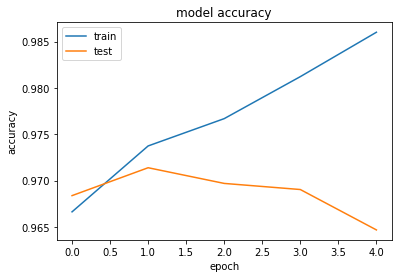

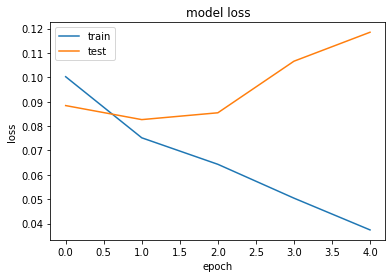

In [32]:
# def KERAS():
model = Sequential()
model.add(Embedding(input_dim=len(ind_to_vec), output_dim=EMBEDDING_DIM,
                  weights=[ind_to_vec], input_length=MAX_SEQUENCE_LENGTH))

model.add(GRU(128,unroll=True))
model.add(Dense(32,activation='tanh'))
model.add(Dense(len(unique_label),activation = 'softmax'))

model.compile(keras.optimizers.adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
history = model.fit(train_x, train_y,epochs=5,batch_size=164,verbose=1,validation_data=(test_x,test_y))
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [26]:
df_test=pd.read_csv("test_preprocessed.csv")

In [28]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 10 columns):
comment_text     153149 non-null object
id               153164 non-null object
identity_hate    0 non-null float64
insult           0 non-null float64
obscene          0 non-null float64
set              153164 non-null object
severe_toxic     0 non-null float64
threat           0 non-null float64
toxic            0 non-null float64
toxicity         0 non-null float64
dtypes: float64(7), object(3)
memory usage: 11.7+ MB


In [33]:
accr = model.evaluate(test_x,test_y)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))


31915/31915 [==============================] - 4s 110us/step
Test set
  Loss: 0.119
  Accuracy: 0.965


In [34]:
model.save("insultmodel.h5")


In [36]:
from keras.models import load_model
my_model=load_model("insultmodel.h5")

C:\Users\hedi\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [37]:
my_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 20, 50)            23735750  
_________________________________________________________________
gru_4 (GRU)                  (None, 128)               68736     
_________________________________________________________________
dense_7 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 66        
Total params: 23,808,680
Trainable params: 23,808,680
Non-trainable params: 0
_________________________________________________________________


In [43]:
my_model.get_weights?

Signature: my_model.get_weights()
Docstring:
Retrieves the weights of the model.

# Returns
    A flat list of Numpy arrays.
File:      c:\users\hedi\.conda\envs\factory619\lib\site-packages\keras\engine\network.py
Type:      method


In [41]:
my_model.optimizer?

Type:        Adam
String form: <keras.optimizers.Adam object at 0x000002F6123F2388>
File:        c:\users\hedi\.conda\envs\factory619\lib\site-packages\keras\optimizers.py
Docstring:  
Adam optimizer.

Default parameters follow those provided in the original paper.

# Arguments
    learning_rate: float >= 0. Learning rate.
    beta_1: float, 0 < beta < 1. Generally close to 1.
    beta_2: float, 0 < beta < 1. Generally close to 1.
    amsgrad: boolean. Whether to apply the AMSGrad variant of this
        algorithm from the paper "On the Convergence of Adam and
        Beyond".

# References
    - [Adam - A Method for Stochastic Optimization](
       https://arxiv.org/abs/1412.6980v8)
    - [On the Convergence of Adam and Beyond](
       https://openreview.net/forum?id=ryQu7f-RZ)


In [22]:
def export_model(saver,input_node_names, output_node_name):
    tf.train.write_graph(K.get_session().graph_def, 'out', MODEL_NAME + '_graph.pbtxt')

    saver.save(K.get_session(), 'out/' + MODEL_NAME + '.chkp')

    freeze_graph.freeze_graph('out/' + MODEL_NAME + '_graph.pbtxt', None, \
        False, 'out/' + MODEL_NAME + '.chkp', output_node_name, \
        "save/restore_all", "save/Const:0", \
        'out/frozen_' + MODEL_NAME + '.pb', True, "")

    input_graph_def = tf.GraphDef()
    with tf.gfile.Open('out/frozen_' + MODEL_NAME + '.pb', "rb") as f:
        input_graph_def.ParseFromString(f.read())

    output_graph_def = optimize_for_inference_lib.optimize_for_inference(
            input_graph_def, input_node_names, [output_node_name],
            tf.float32.as_datatype_enum)

    with tf.gfile.FastGFile('out/opt_' + MODEL_NAME + '.pb', "wb") as f:
        f.write(output_graph_def.SerializeToString())

    print("graph saved!")
#export_model(tf.train.Saver(),["embedding_1_input"], "dense_2/Softmax")

In [23]:
export_model(tf.train.Saver(),["embedding_1_input"], "dense_2/Softmax")

AttributeError: module 'tensorflow_core._api.v2.train' has no attribute 'Saver'